In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf
import time as t

In [2]:
w=32

In [3]:
dataFromSensors=np.load("DataWithLabels/dataFromSensors_"+str(w)+".npy")

In [4]:
np.info(dataFromSensors)

class:  ndarray
shape:  (475305, 32, 16)
strides:  (4096, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x21fe0f32040
byteorder:  little
byteswap:  False
type: float64


In [5]:
labels=np.load("DataWithLabels/labels_"+str(w)+".npy")

In [6]:
np.info(labels)

class:  ndarray
shape:  (475305,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x22054feb040
byteorder:  little
byteswap:  False
type: float64


In [7]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [8]:
training_sample_labels

380244

In [9]:
training_sample

380244

In [10]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [11]:
train_X.shape

(380244, 32, 15)

In [12]:
train_y

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
#print(train_X)

In [14]:
train_y.shape

(380244,)

In [15]:
#print(test_y)

In [16]:
train_y=train_y.reshape(train_y.shape[0],1)

In [17]:
test_y=test_y.reshape(test_y.shape[0],1)

In [18]:
#print(train_X)

In [19]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(380244, 32, 15) (380244, 1) (95061, 32, 15) (95061, 1)


In [20]:
model_gru =  keras.models.Sequential([
    keras.layers.GRU(256,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2])),#,activation='relu'),
    keras.layers.GRU(units=128,return_sequences=True),#,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.GRU(units=64),#,activation='relu'),
    keras.layers.Dense(units=100,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])
model_gru.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])

In [21]:
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 32, 256)           209664    
                                                                 
 gru_1 (GRU)                 (None, 32, 128)           148224    
                                                                 
 dropout (Dropout)           (None, 32, 128)           0         
                                                                 
 gru_2 (GRU)                 (None, 64)                37248     
                                                                 
 dense (Dense)               (None, 100)               6500      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 401,737
Trainable params: 401,737
Non-trai

In [22]:
 start = t.time()

In [23]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=140,validation_data=(test_X, test_y), batch_size=128)#, shuffle=False)

Epoch 1/140
2971/2971 [==============================] - 87s 27ms/step - loss: 0.5719 - accuracy: 0.7390 - val_loss: 0.5539 - val_accuracy: 0.7530
Epoch 2/140
2971/2971 [==============================] - 78s 26ms/step - loss: 0.5545 - accuracy: 0.7396 - val_loss: 0.5253 - val_accuracy: 0.7499
Epoch 3/140
2971/2971 [==============================] - 79s 26ms/step - loss: 0.5188 - accuracy: 0.7399 - val_loss: 0.4946 - val_accuracy: 0.7462
Epoch 4/140
2971/2971 [==============================] - 79s 26ms/step - loss: 0.5048 - accuracy: 0.7370 - val_loss: 0.4878 - val_accuracy: 0.7513
Epoch 5/140
2971/2971 [==============================] - 79s 26ms/step - loss: 0.5018 - accuracy: 0.7371 - val_loss: 0.4860 - val_accuracy: 0.7530
Epoch 6/140
2971/2971 [==============================] - 78s 26ms/step - loss: 0.5003 - accuracy: 0.7380 - val_loss: 0.4911 - val_accuracy: 0.7534
Epoch 7/140
2971/2971 [==============================] - 78s 26ms/step - loss: 0.4990 - accuracy: 0.7390 - val_loss: 0

2971/2971 [==============================] - 76s 26ms/step - loss: 0.4444 - accuracy: 0.7712 - val_loss: 0.4378 - val_accuracy: 0.7733
Epoch 57/140
2971/2971 [==============================] - 76s 26ms/step - loss: 0.4442 - accuracy: 0.7711 - val_loss: 0.4385 - val_accuracy: 0.7754
Epoch 58/140
2971/2971 [==============================] - 76s 26ms/step - loss: 0.4437 - accuracy: 0.7714 - val_loss: 0.4384 - val_accuracy: 0.7743
Epoch 59/140
2971/2971 [==============================] - 76s 26ms/step - loss: 0.4434 - accuracy: 0.7712 - val_loss: 0.4365 - val_accuracy: 0.7749
Epoch 60/140
2971/2971 [==============================] - 76s 25ms/step - loss: 0.4431 - accuracy: 0.7720 - val_loss: 0.4403 - val_accuracy: 0.7719
Epoch 61/140
2971/2971 [==============================] - 76s 26ms/step - loss: 0.4431 - accuracy: 0.7722 - val_loss: 0.4362 - val_accuracy: 0.7746
Epoch 62/140
2971/2971 [==============================] - 76s 26ms/step - loss: 0.4425 - accuracy: 0.7728 - val_loss: 0.4390 

2971/2971 [==============================] - 76s 26ms/step - loss: 0.4326 - accuracy: 0.7782 - val_loss: 0.4293 - val_accuracy: 0.7803
Epoch 112/140
2971/2971 [==============================] - 76s 26ms/step - loss: 0.4325 - accuracy: 0.7781 - val_loss: 0.4304 - val_accuracy: 0.7803
Epoch 113/140
2971/2971 [==============================] - 76s 26ms/step - loss: 0.4322 - accuracy: 0.7783 - val_loss: 0.4279 - val_accuracy: 0.7809
Epoch 114/140
2971/2971 [==============================] - 76s 26ms/step - loss: 0.4321 - accuracy: 0.7787 - val_loss: 0.4281 - val_accuracy: 0.7815
Epoch 115/140
2971/2971 [==============================] - 76s 26ms/step - loss: 0.4319 - accuracy: 0.7786 - val_loss: 0.4350 - val_accuracy: 0.7810
Epoch 116/140
2971/2971 [==============================] - 76s 26ms/step - loss: 0.4316 - accuracy: 0.7786 - val_loss: 0.4317 - val_accuracy: 0.7790
Epoch 117/140
2971/2971 [==============================] - 76s 26ms/step - loss: 0.4316 - accuracy: 0.7784 - val_loss: 0

In [24]:
pred_y =  model_gru.predict(test_X)

2971/2971 [==============================] - 22s 7ms/step


In [25]:
stop=t.time()-start
print(stop)

10905.522015810013


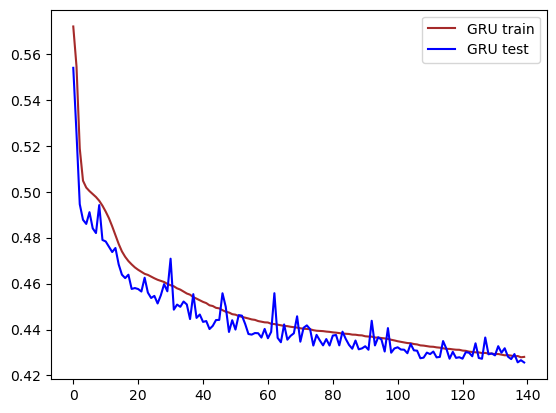

In [26]:
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

In [27]:
print(test_y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [28]:
np.shape(pred_y)

(95061, 1)

In [29]:
pred_y

array([[0.00066275],
       [0.00279264],
       [0.00128255],
       ...,
       [0.07386243],
       [0.07457624],
       [0.07655073]], dtype=float32)

In [31]:
pred_y=np.reshape(pred_y,95061)

0.14268821305284168
0.23273263526482946
0.3777409337798085
0.28663711498479916


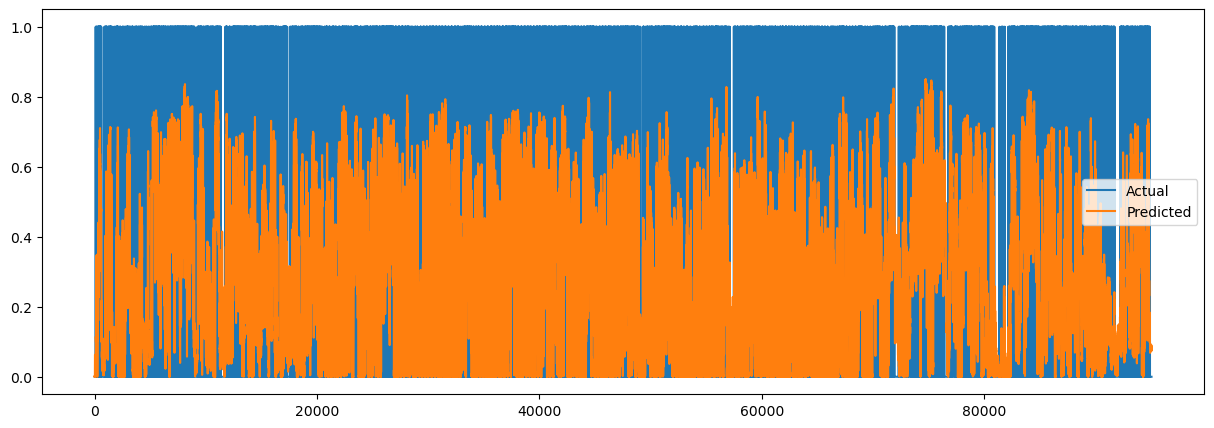

In [32]:

plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)


plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [33]:
np.shape(train_X)

(380244, 32, 15)

In [34]:
np.shape(train_y)

(380244, 1)

In [35]:
np.shape(test_X)

(95061, 32, 15)

In [36]:
np.shape(test_y)

(95061, 1)

14854/14854 [==============================] - 130s 9ms/step


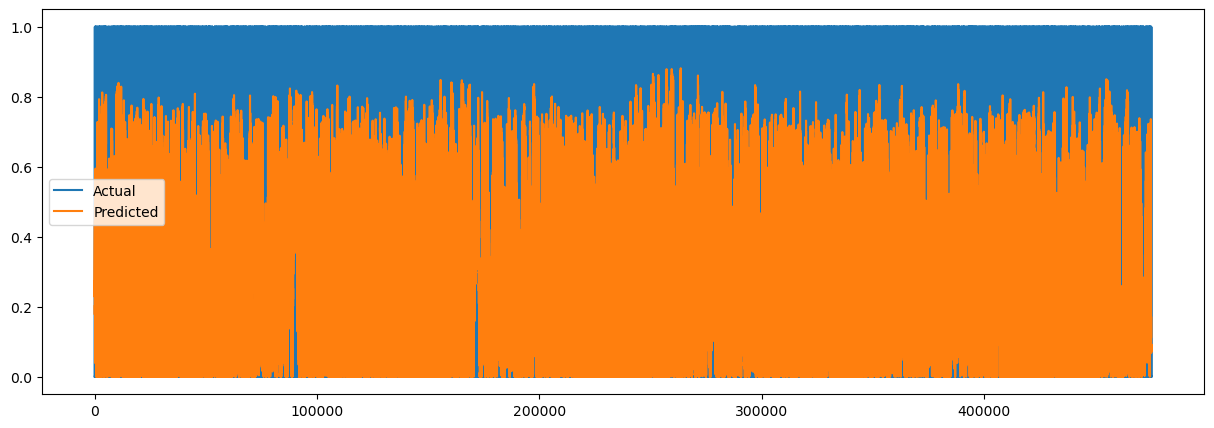

In [37]:
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

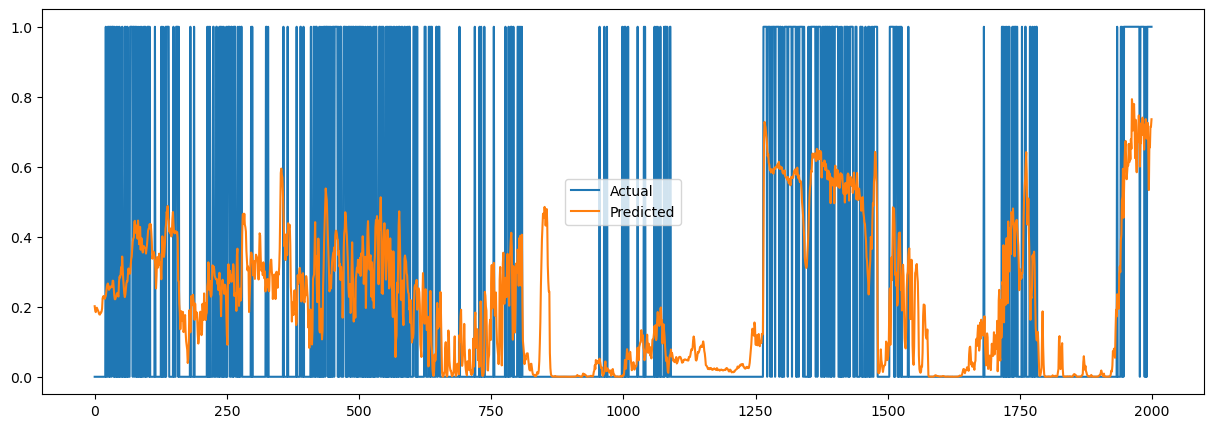

In [38]:
plt.plot(tes[:2000], label = 'Actual')
plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [39]:
print(sum(tes)/len(tes))

[0.25795437]


In [40]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.59775058]
[0.828874]
total acc [0.78183482]


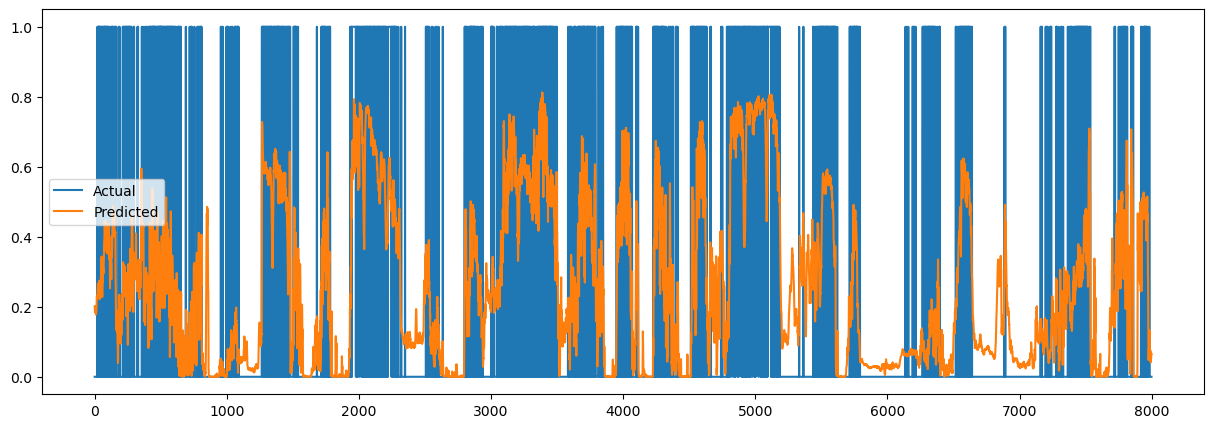

In [41]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

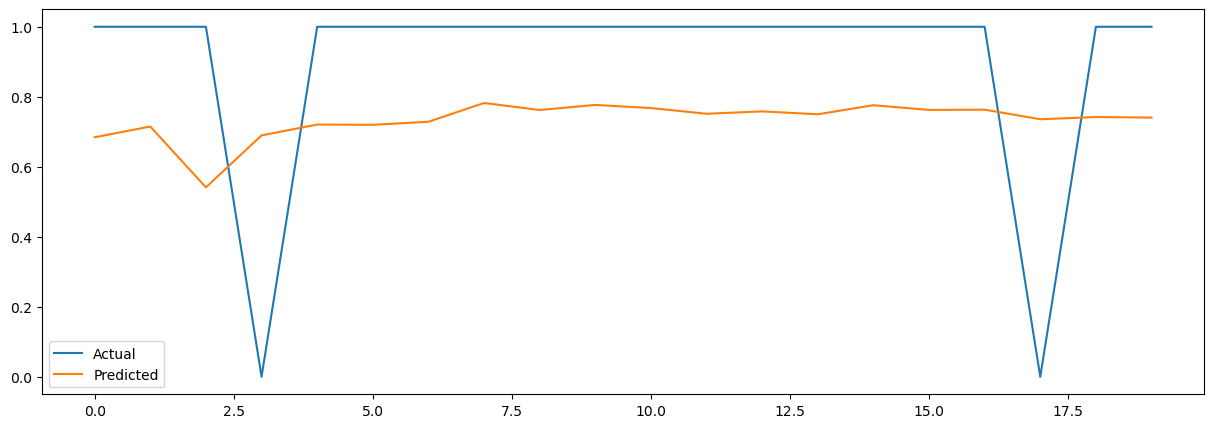

In [42]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

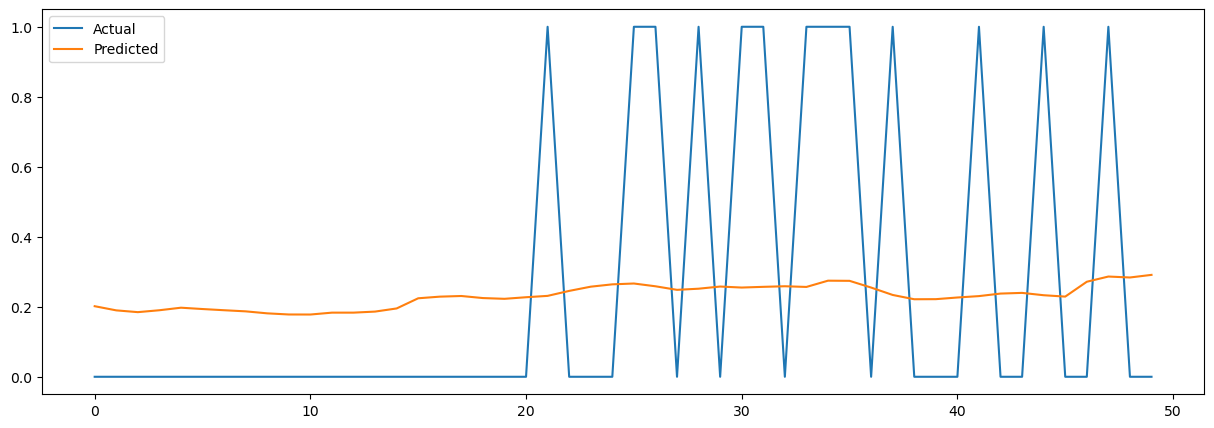

In [43]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

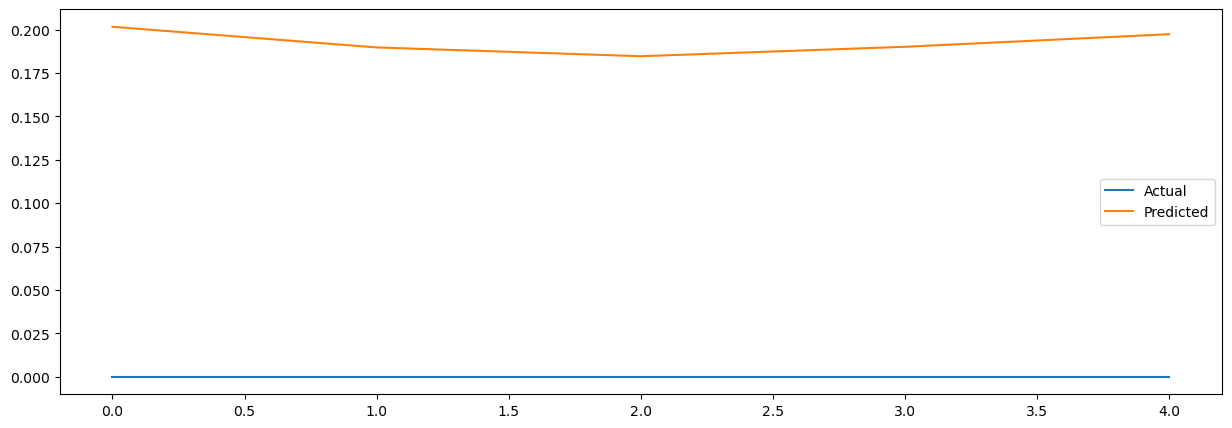

In [44]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()

### 